In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
# code adapted from: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [3]:
df = pd.read_csv("output/df_train_set.csv")
df['sol_category'] = pd.to_numeric(df['sol_category'], downcast='integer')
df.drop(columns=['Id','smiles'], inplace=True)

In [4]:
df = df.dropna(axis=1)
list_x = [column for column in df.columns if (column.startswith('ecfp_') or column.startswith('example_') or column.startswith('rdkit_desc_'))]
x = df[list_x]
x

,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,ecfp_8,ecfp_9,...,rdkit_desc_fr_sulfide,rdkit_desc_fr_sulfonamd,rdkit_desc_fr_sulfone,rdkit_desc_fr_term_acetylene,rdkit_desc_fr_tetrazole,rdkit_desc_fr_thiazole,rdkit_desc_fr_thiocyan,rdkit_desc_fr_thiophene,rdkit_desc_fr_unbrch_alkane,rdkit_desc_fr_urea
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70707,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70708,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70709,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
#y = df.loc[:,['sol_category']].values
#y

In [6]:
x = StandardScaler().fit_transform(x)
x

array([[-3.76062113e-03, -1.18928851e-02, -9.21192857e-03, ...,
        -2.45711327e-01, -2.06510961e-01,  2.70672773e+00],
       [-3.76062113e-03, -1.18928851e-02, -9.21192857e-03, ...,
        -2.45711327e-01, -2.06510961e-01, -3.60015173e-01],
       [-3.76062113e-03, -1.18928851e-02, -9.21192857e-03, ...,
         3.90887826e+00, -2.06510961e-01, -3.60015173e-01],
       ...,
       [-3.76062113e-03, -1.18928851e-02, -9.21192857e-03, ...,
        -2.45711327e-01, -2.06510961e-01, -3.60015173e-01],
       [-3.76062113e-03, -1.18928851e-02, -9.21192857e-03, ...,
        -2.45711327e-01, -2.06510961e-01,  2.70672773e+00],
       [-3.76062113e-03, -1.18928851e-02, -9.21192857e-03, ...,
        -2.45711327e-01, -2.06510961e-01,  2.70672773e+00]])

In [7]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [8]:
finalDf = pd.concat([principalDf, df[['sol_category']]], axis = 1)

In [9]:
finalDf

,principal component 1,principal component 2,sol_category
0,5.945864,-2.755517,0
1,-3.323832,7.802216,0
2,-6.050378,-2.684358,0
3,-3.111487,-1.488172,0
4,-0.482087,-6.041989,0
...,...,...,...
70706,-6.569074,3.455311,2
70707,1.696027,5.489580,2
70708,1.486842,3.686670,2
70709,8.741335,-2.037144,2


In [10]:
from matplotlib import pyplot as plt

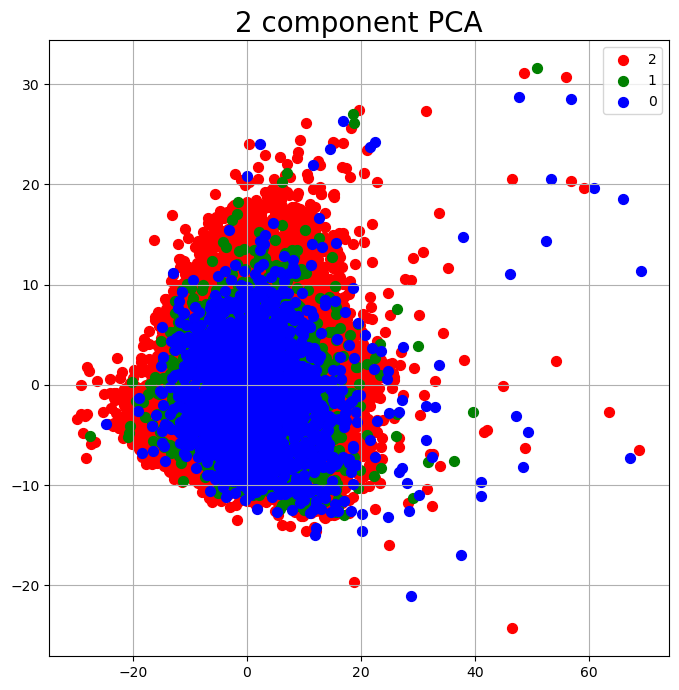

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [2, 1, 0] #'low solubility', 'medium  solubility', 'high  solubility']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['sol_category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()